# Conhecendo dados 

In [20]:
import pandas as pd
dados = pd.read_csv('dados.csv')
dados.head(5)


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


Varáveis qualitativas ordinais
> variaveis que podem ser ordenadas ou hierarquizadas

In [21]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [22]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize=True) * 100
index = ['Masculino', 'Feminino']

dist_freq_qualitativas = pd.DataFrame({'Frequencia':frequencia, 'Percentual(%)':percentual })
dist_freq_qualitativas.index = index

In [23]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

<h1> CrossTab:</h1>


> https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html


<h2> Quantidade de pessoas por cor e sexo

In [24]:
frequencia = pd.crosstab(
    dados.Sexo,
    dados.Cor
)
frequencia.rename(index=sexo).rename(columns=cor)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


<h2> Porcentagem da quantidade de pessoas por cor e sexo

In [25]:
percentual = pd.crosstab(
    dados.Sexo,
    dados.Cor, normalize=True
) * 100 
frequencia.rename(index=sexo).rename(columns=cor)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


<h2>Media da renda por Cor e por Sexo

In [26]:
percentual = pd.crosstab(
    dados.Sexo,
    dados.Cor,
    aggfunc= 'mean',
    values=dados.Renda
)
percentual.rename(index=sexo).rename(columns=cor)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


<h2> Categorizando  </h2>
A - acima de 15.750<br>
B - De 7.880 a 15.760<br>
C - De 3.152 a 7.880<br>
D - De 1.576 a 3.152<br>
E - Até 1.576 <br>

In [27]:
print(dados.Renda.min(),"a",
dados.Renda.max())

0 a 200000


In [28]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B' , 'A'] 

In [29]:
corte = pd.cut(x = dados.Renda, bins = classes, labels=labels,
include_lowest=True)

In [30]:

porcentagem = pd.value_counts(corte, normalize=True) * 100
quantidade  = pd.value_counts(corte)

dist_freq_quantitativas = pd.DataFrame({
    "Quantidade":quantidade,
    "Porcentagem(%)": porcentagem,
    
})
dist_freq_quantitativas.sort_index(ascending=False, inplace=True)
display(dist_freq_quantitativas)

,Quantidade,Porcentagem(%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [31]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


<h1> Regra de strugles

In [32]:
import numpy as np

In [33]:
n = dados.shape[0]
n

76840

In [34]:
k = 1 + (10/3) * np.log10(n)

In [35]:
k = int(k.round(0))

<h2> Visualizando 

In [36]:
porcentagem = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest= True
    ),
    sort = False,
    normalize = True
)
frequencia  = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest= True
    ),
    sort = False
)

dist_frequencia_porcentagem_amplitude_fixa = pd.DataFrame({
    'Frequencia': frequencia,
    'Porcentagem(%)':( porcentagem * 100).round(3)
})

In [37]:
letras = ('a b c d e f g h i j k l m n o p q'.upper()).split()
index = []
numero = 0
for item in dist_frequencia_porcentagem_amplitude_fixa.index:
    index.append(f'{letras[numero]} : {item}')
    numero += 1
dist_frequencia_porcentagem_amplitude_fixa.index = index

In [38]:
dist_frequencia_porcentagem_amplitude_fixa

,Frequencia,Porcentagem(%)
"A : (-200.001, 11764.706]",75594,98.378
"B : (11764.706, 23529.412]",1022,1.330
"C : (23529.412, 35294.118]",169,0.220
"D : (35294.118, 47058.824]",19,0.025
"E : (47058.824, 58823.529]",16,0.021
"F : (58823.529, 70588.235]",5,0.007
"G : (70588.235, 82352.941]",4,0.005
"H : (82352.941, 94117.647]",1,0.001
"I : (94117.647, 105882.353]",6,0.008
"J : (105882.353, 117647.059]",0,0.000


In [40]:
import seaborn as sns

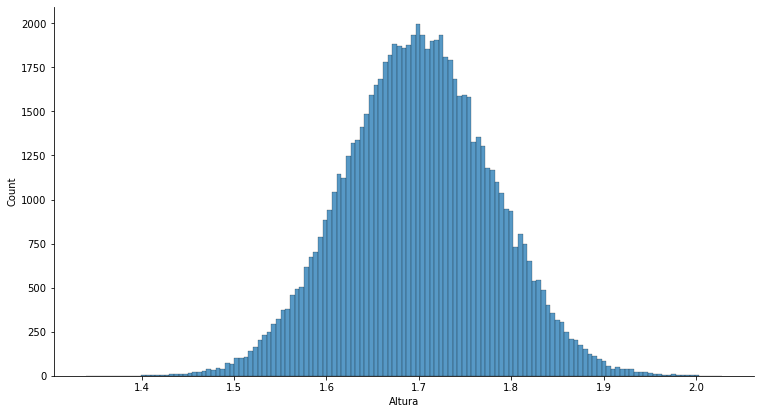

In [45]:
ax = sns.displot(dados.Altura)
ax.figure.set_size_inches(12,6)
ax.set_titles('Distribuição de frequencias')
ax = ax

,Quantidade,Porcentagem(%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


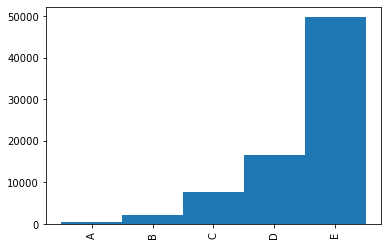

In [49]:
from ctypes.wintypes import SIZE
from turtle import width


dist_freq_quantitativas['Quantidade'].plot.bar(width=1)
dist_freq_quantitativas